#LaSNe
Visualing Twitter RT Networks during 2014 Ukraine Crisis

In [96]:
sys.path.insert(0, './LaSNe')

import os
import sys
import matplotlib.pyplot as plt
import seaborn
from src.main import *
%matplotlib inline

## Data Understanding

Daily Network Data is stored in GML files from Nov 2013 - Dec 2014

***********
- Nodes represent twitter users
- Also contain information about user ideologies

In [71]:
!head './gmls/rt_2014_2_9.langfilt.gml'

graph [
  directed 1
  node [
    id 0
    label 2302279680
    pro_russian 0
    pro_eu 0
    screen_name "melbrodanome"
    ideology "Unknown"
  ]


-------------
- Edges represent retweets
- Directed edges: Edge points to the original tweeter
- Tweet language information stored in edge

In [72]:
!tail './gmls/rt_2014_2_9.langfilt.gml'

    weight 1
    language "ru"
  ]
  edge [
    source 8426
    target 7937
    weight 1
    language "ru"
  ]
]


------------------------------
Network size varies a lot:
- Biggest network - 52k Nodes/139k Edges
- Smallest network - 138 Nodes/139 Edges

In [84]:
files = os.listdir('./gmls')
files.remove('rt_2014_1_23.langfilt.gml')
all_nodes = []
all_edges = []
for f in files:
    srcs,targets = parseGML('./gmls/'+f)
    all_nodes.append(len(srcs))
    all_edges.append(srcs.sum())
x = np.arange(1,len(all_nodes)+1)

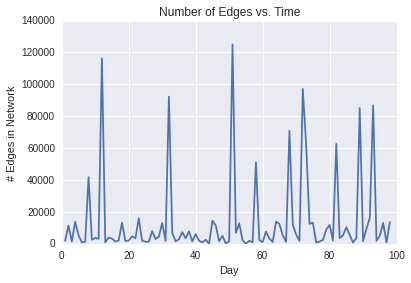

In [100]:
plt.plot(x,all_edges)
plt.title("Number of Edges vs. Time")
plt.xlabel("Day")
plt.ylabel("# Edges in Network")

In [81]:
nodeSources, nodeTargets = parseGML('./gmls/rt_2014_2_9.langfilt.gml')
print("Number of nodes: ",len(nodeSources))
print("Number of edges: ", nodeSources.sum())
freqSources = getFrequencyCounts(nodeSources)
freqTargets = getFrequencyCounts(nodeTargets)

('Number of nodes: ', 8427)
('Number of edges: ', 13927)


--------------
Network is bipartiate - nodes are either sources (retweeters) or targets (tweeters)

In [82]:
print("Number of nodes that are never sources: ", freqSources[0][1])
print("Number of nodes that are never targets: ", freqTargets[0][1])
print("Number of nodes that are both source and target: ", nodeSources.shape[0] - freqSources[0][1] - freqTargets[0][1])

print("This is 0 if sources and targets are disjoint : ", np.dot(nodeSources, nodeTargets))

('Number of nodes that are never sources: ', 1999)
('Number of nodes that are never targets: ', 6428)
('Number of nodes that are both source and target: ', 0)
('This is 0 if sources and targets are disjoint : ', 0)
